# Final Project Machine Learning Course


## Movie Genre Classification
Dataset link: [Genre Classification Dataset - IMDb](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data)





### We are tasked to classify genre to movie base on the description.






## Load dataset
### Overview:

The dataset is sourced from IMDb (Internet Movie Database),
a comprehensive online database containing information about films, TV shows, videos, games, and streaming content.

### Content:
The dataset consists of two main components: train data and test data.

* Train Data:

 - Each entry includes an ID, title, genre, and description.
 - The ID uniquely identifies each entry.
 - Title represents the name of the movie or TV show.
 - Genre specifies the category or categories to which the title belongs.
 - Description provides a brief overview or summary of the title's plot or content.

Test Data:

* Test Data:

    - Similar to train data, each entry comprises an ID, title, genre, and description.

In [1]:
import pandas as pd

#read the data using pandas

train_path = 'Genre Classification Dataset/train_data.txt'
train_data = pd.read_csv(train_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

test_path = 'Genre Classification Dataset/test_data_solution.txt'
test_data = pd.read_csv(test_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])




In [2]:
# view the data
print("shape of train data")
print(train_data.shape)

print("shape of test data")
print(test_data.shape)

shape of train data
(54214, 4)
shape of test data
(54200, 4)


In [3]:
train_data.head(n=7)

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...


In [5]:
import nltk
from nltk import LancasterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Cleaning and Preprocessing
We will clean and preprocess the data
- Remove duplicates and NaN values.
- Preprocess the text data (description) for better model performance.


In [6]:
## Check for Duplicates and Remove them
num = train_data.duplicated().sum()
print(num)
if num > 0:
    train_data.drop_duplicates(inplace=True)

0


In [7]:
## Check for nan values
num = train_data.isna().sum()
print(num)
train_data.dropna(inplace=True)

ID             0
Title          0
Genre          0
Description    0
dtype: int64


In [8]:
# Preprocessing

#Get the list of English stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)



#Lanc = LancasterStemmer()


def clean_text(text):
    # Expand contractions


    # Remove URLs and email addresses
    text = re.sub(r'\b(?:https?://|www\.)\S+\b', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Remove special characters, punctuation, and symbols and numbers.
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    word_tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    word_tokens = [word for word in word_tokens if word not in stop_words]

    # Lemmatization
    # We found that it didn't improve accuracy and might have even reduced it.
    # lemmatizer = WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(word_tokens)

    return cleaned_text



train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)
train_data.head()

{'and', 'up', 'wouldn', 'further', 'off', 'nor', "aren't", 'other', 'but', 'am', 'own', 'my', 'from', 'didn', 'down', 'any', 'yourselves', 'no', 'doing', 'o', 'wasn', 'few', 'do', 'was', 'won', 'against', 'he', 'isn', 'couldn', 'its', 'there', 'aren', "doesn't", 'how', 'to', "it's", "shouldn't", 'while', "you're", "haven't", 'me', 'his', 'mustn', 'again', "don't", "mightn't", "you've", 'about', 'ma', 'most', 'here', 'were', 'itself', 'those', 'she', 's', 'then', 'only', 'been', 'who', "weren't", 'why', 'for', 'it', 'into', 'during', 've', 'if', 'hasn', 'needn', 'i', 'by', 'should', 'that', 'at', 'as', 'after', 'having', "didn't", 'some', 'out', 'these', 'just', 'the', 'so', "won't", 'hadn', 'we', 'until', 'all', 'their', 'have', 'don', 'this', "shan't", 'where', 'than', 'a', "hadn't", 'under', 'will', 'shouldn', 'or', 'him', 'himself', 'hers', 'herself', 'whom', 'did', 'll', 'being', "wasn't", 'what', 't', 'ourselves', 'between', "she's", 'such', 'each', 'your', 'myself', "hasn't", 'ou

,ID,Title,Genre,Description,Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


###  Data Visualization


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_data["Genre"].value_counts()

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

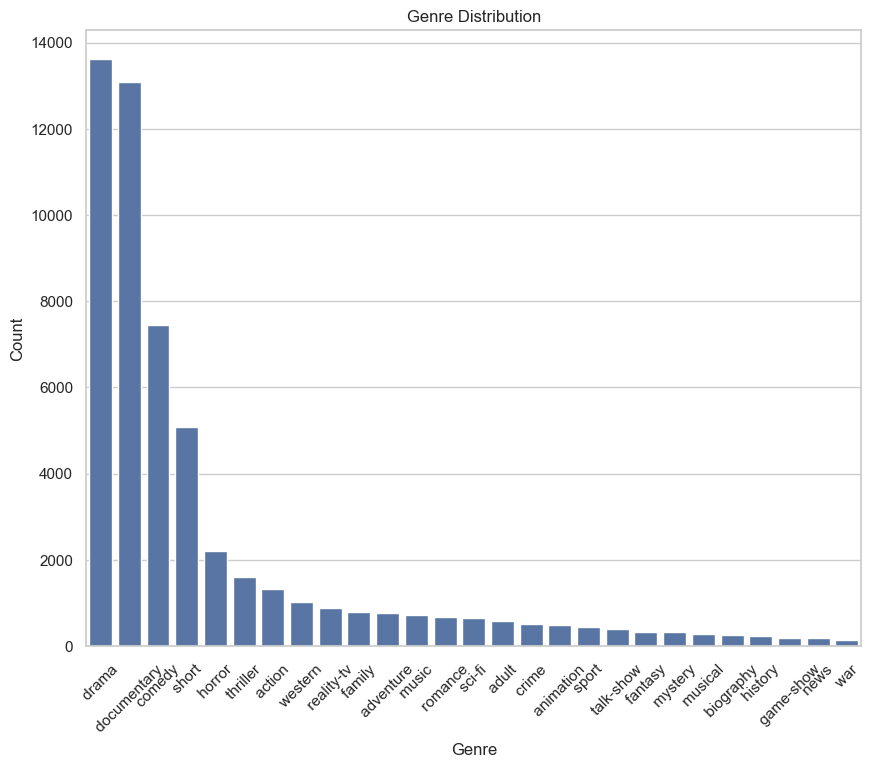

In [11]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting genre distribution horizontally
plt.figure(figsize=(10, 8))
sns.countplot(x='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### We can clearly see that the data is not balanced so we try to take a threshold of 2000.

In [12]:
# Choose the minimum threshold
min_threshold = 2000

# Filter the train dataset based on the minimum threshold
filtered_train_classes = train_data['Genre'].value_counts()[train_data['Genre'].value_counts() >= min_threshold].index
filtered_train_data = train_data[train_data['Genre'].isin(filtered_train_classes)]

# Sample approximately min_threshold samples from each class in the train set
sampled_train_data = pd.DataFrame()
for genre in filtered_train_classes:
    genre_train_data = filtered_train_data[filtered_train_data['Genre'] == genre]
    sampled_train_data = pd.concat([sampled_train_data, genre_train_data.sample(n=min_threshold, random_state=42)])

# Filter the test dataset based on the minimum threshold
filtered_test_classes = test_data['Genre'].value_counts()[test_data['Genre'].value_counts() >= min_threshold].index
filtered_test_data = test_data[test_data['Genre'].isin(filtered_test_classes)]

# Sample approximately min_threshold samples from each class in the test set
sampled_test_data = pd.DataFrame()
for genre in filtered_test_classes:
    genre_test_data = filtered_test_data[filtered_test_data['Genre'] == genre]
    sampled_test_data = pd.concat([sampled_test_data, genre_test_data.sample(n=min_threshold, random_state=42)])

In [13]:
print("shape of train data")
print(sampled_test_data.shape)
sampled_test_data.head()



shape of train data
(10000, 5)


,ID,Title,Genre,Description,Text_cleaning
29295,29296,Drawing Dead (????/III),drama,A down-on-his-luck gambler has blown through ...,downonhisluck gambler blown winnings borrowed ...
21816,21817,Animals (2014/III),drama,ANIMALS tells the story of Jude and Bobbie: a...,animals tells story jude bobbie young couple e...
32303,32304,Mossane (1996),drama,Mossane is a beautiful 14-year-old girl who h...,mossane beautiful yearold girl reached marriag...
358,359,Xiang ji mao yi yang fei (2002),drama,"Undecided about his future, Yun Fei, an unkno...",undecided future yun fei unknown young poet go...
28903,28904,"Die Zeit, die man Leben nennt (2008)",drama,Congenial young pianist Luca is just one step...,congenial young pianist luca one step big inte...


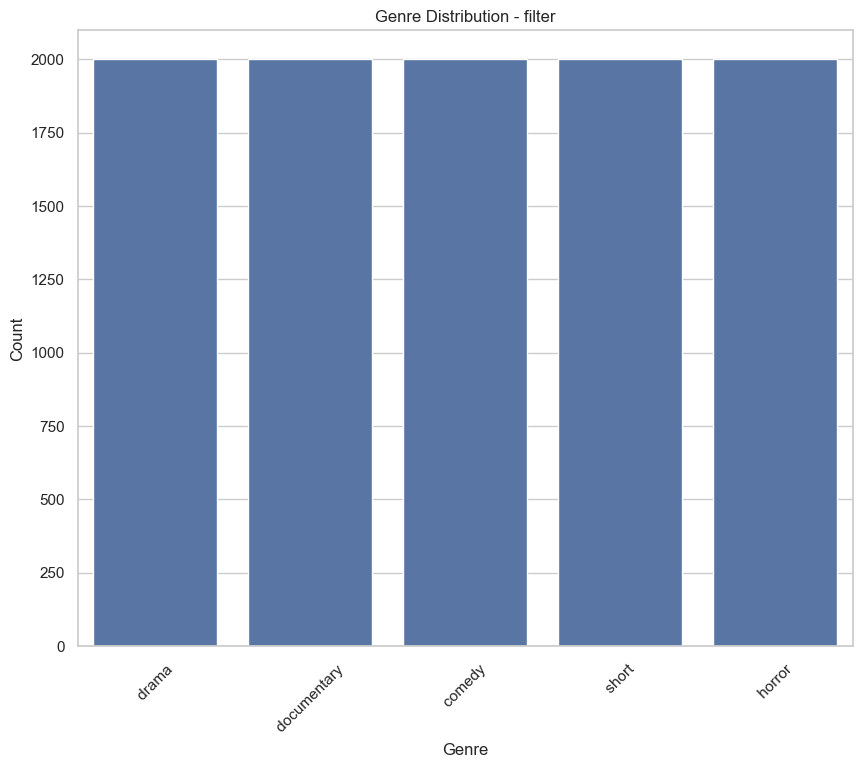

In [14]:
#Now lest look
# Plotting genre distribution horizontally
plt.figure(figsize=(10, 8))
sns.countplot(x='Genre', data=sampled_train_data, order=sampled_train_data['Genre'].value_counts().index)
plt.title('Genre Distribution - filter')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


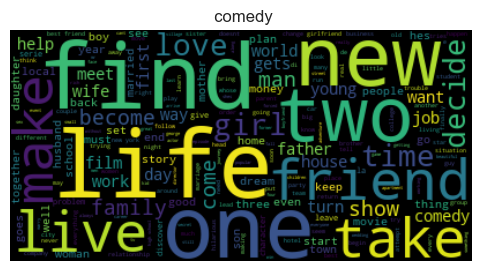

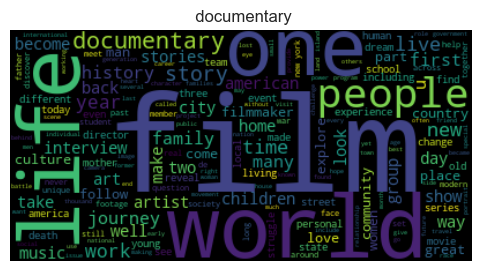

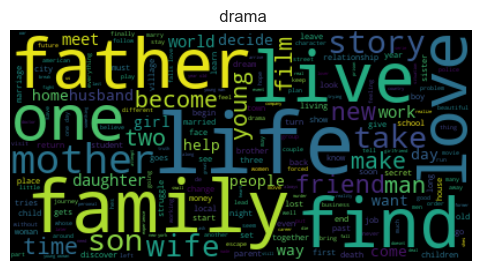

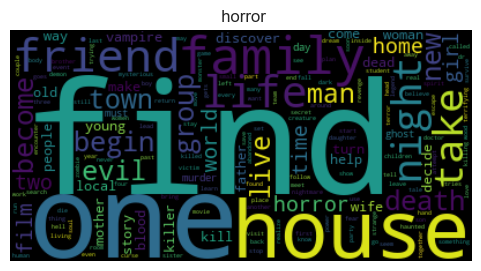

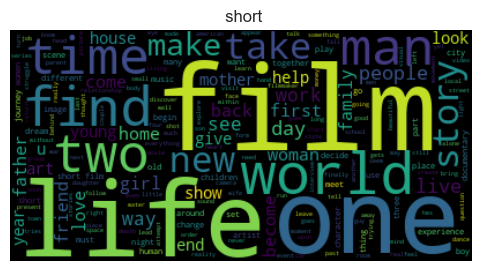

In [15]:
import wordcloud
from wordcloud import WordCloud


# Group movie descriptions by genre
genre_groups = sampled_train_data.groupby('Genre')['Text_cleaning'].apply(lambda x: ' '.join(x))

# Plot word clouds for each genre
for genre, descriptions in genre_groups.items():
    wordcloud = WordCloud(width=400, height=200).generate(descriptions)

    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f' {genre}')
    plt.axis('off')
    plt.show()

# Text to vectors

We want to try 2 different approaches here:
* CountVectorizer
* TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [17]:

# CountVectorizer
count_vectorizer = CountVectorizer()
count_vectors_train = count_vectorizer.fit_transform(sampled_train_data['Text_cleaning'])
count_vectors_test = count_vectorizer.transform(sampled_test_data['Text_cleaning'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors_train = tfidf_vectorizer.fit_transform(sampled_train_data['Text_cleaning'])
tfidf_vectors_test = tfidf_vectorizer.transform(sampled_test_data['Text_cleaning'])



# Evaluate the Model
We aim to evaluate various models on our dataset to determine which one yields the best results.

## Models to be Evaluated:
* Naive Bayes: Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It's simple yet effective for text classification tasks.

* K-Nearest Neighbors (KNN): KNN is a non-parametric, lazy learning algorithm used for classification and regression tasks. It classifies objects based on the majority votes of its neighbors.

* Decision Tree Classifier: Decision trees recursively split the data into subsets based on the most significant attribute at each step. They're intuitive and can handle both numerical and categorical data.

* Random Forest: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

* Logistic Regression: Despite its name, logistic regression is a linear model for binary classification that predicts the probability of occurrence of an event by fitting data to a logistic function.

* Support Vector Machine (SVM): SVM is a powerful supervised learning algorithm used for classification and regression tasks. It finds the hyperplane that best separates data into different classes.

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix

### Naive Bayes

Naive Bayes using Tf-Idf
Accuracy: 0.656

Classification Report:
               precision    recall  f1-score   support

      comedy        0.70      0.58      0.64      2000
 documentary        0.64      0.83      0.72      2000
       drama        0.55      0.64      0.59      2000
      horror        0.72      0.91      0.81      2000
       short        0.72      0.31      0.43      2000

     accuracy                           0.66     10000
    macro avg       0.67      0.66      0.64     10000
 weighted avg       0.67      0.66      0.64     10000



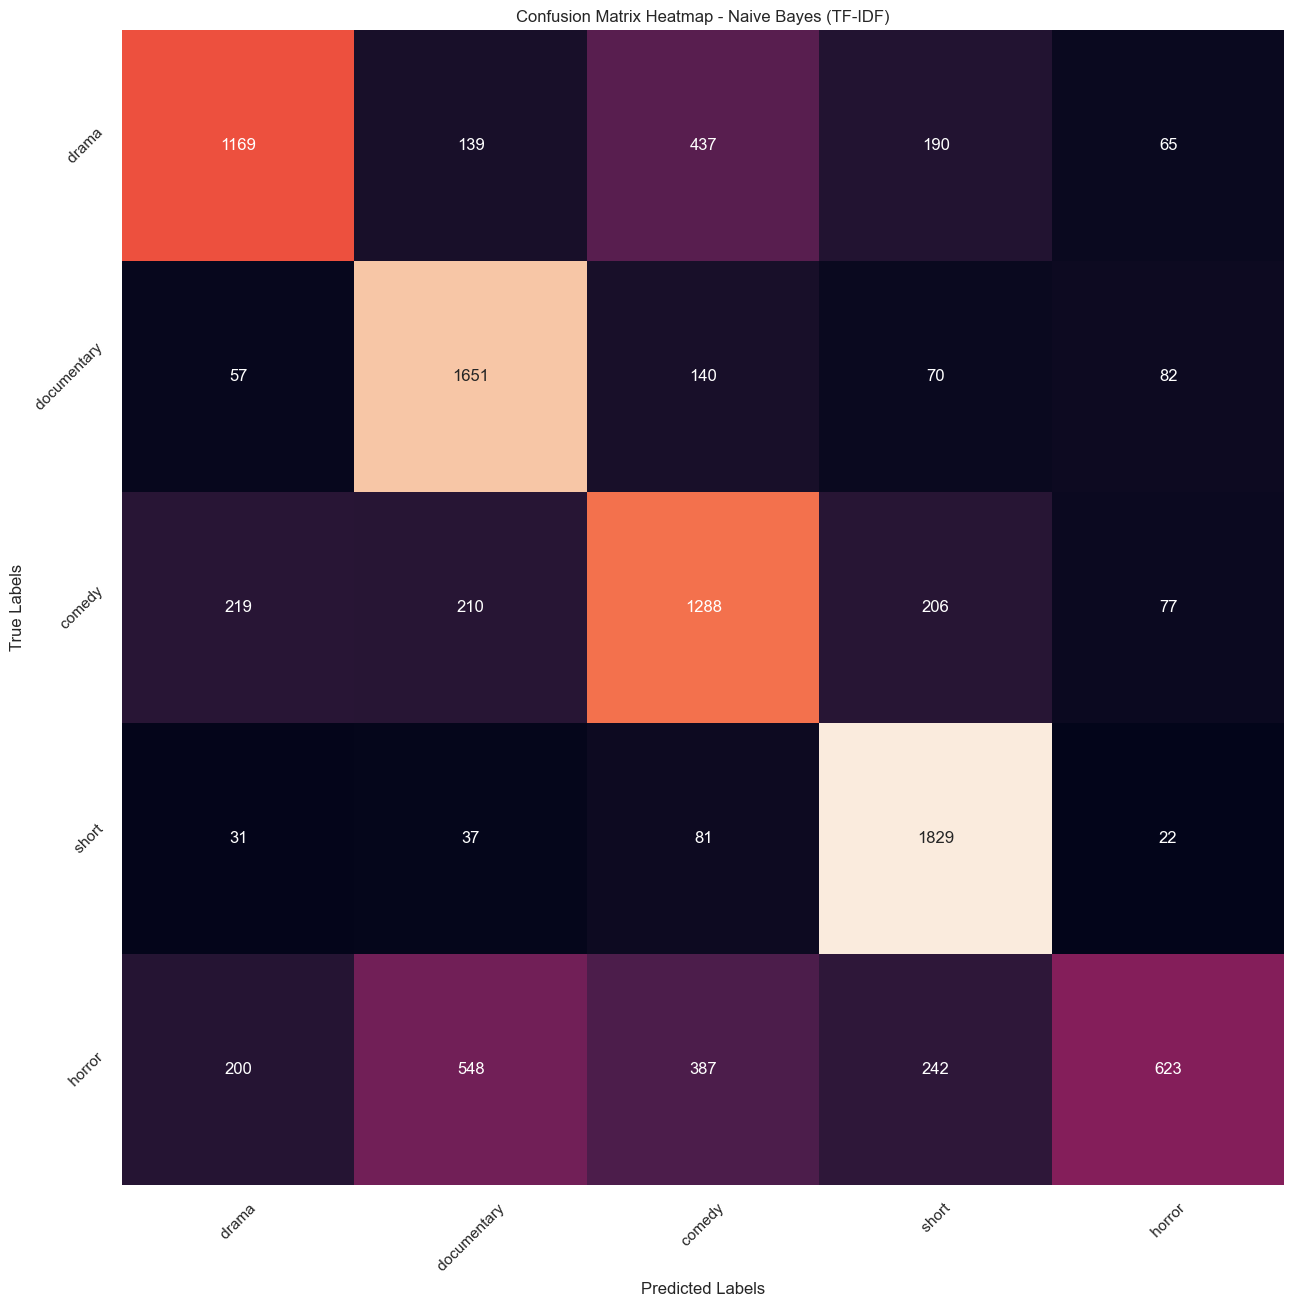

In [21]:
print('Naive Bayes using Tf-Idf')

# Initialize the Naive Bayes classifier
nb_tfidf_classifier = MultinomialNB()

# Train the classifier
nb_tfidf_classifier.fit(tfidf_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_nb_tfidf = nb_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_tfidf = accuracy_score(sampled_test_data['Genre'], predictions_nb_tfidf)
print("Accuracy:", accuracy_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_nb_tfidf))


# Confusion matrix for Naive Bayes with TF-IDF
cm_nb_tfidf = confusion_matrix(sampled_test_data['Genre'], predictions_nb_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Naive Bayes (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


Naive Bayes using CountVectorizer
Accuracy with CountVectorizer: 0.6587

Classification Report with CountVectorizer:
               precision    recall  f1-score   support

      comedy        0.70      0.59      0.64      2000
 documentary        0.63      0.83      0.72      2000
       drama        0.55      0.66      0.60      2000
      horror        0.76      0.89      0.82      2000
       short        0.67      0.33      0.45      2000

     accuracy                           0.66     10000
    macro avg       0.66      0.66      0.64     10000
 weighted avg       0.66      0.66      0.64     10000



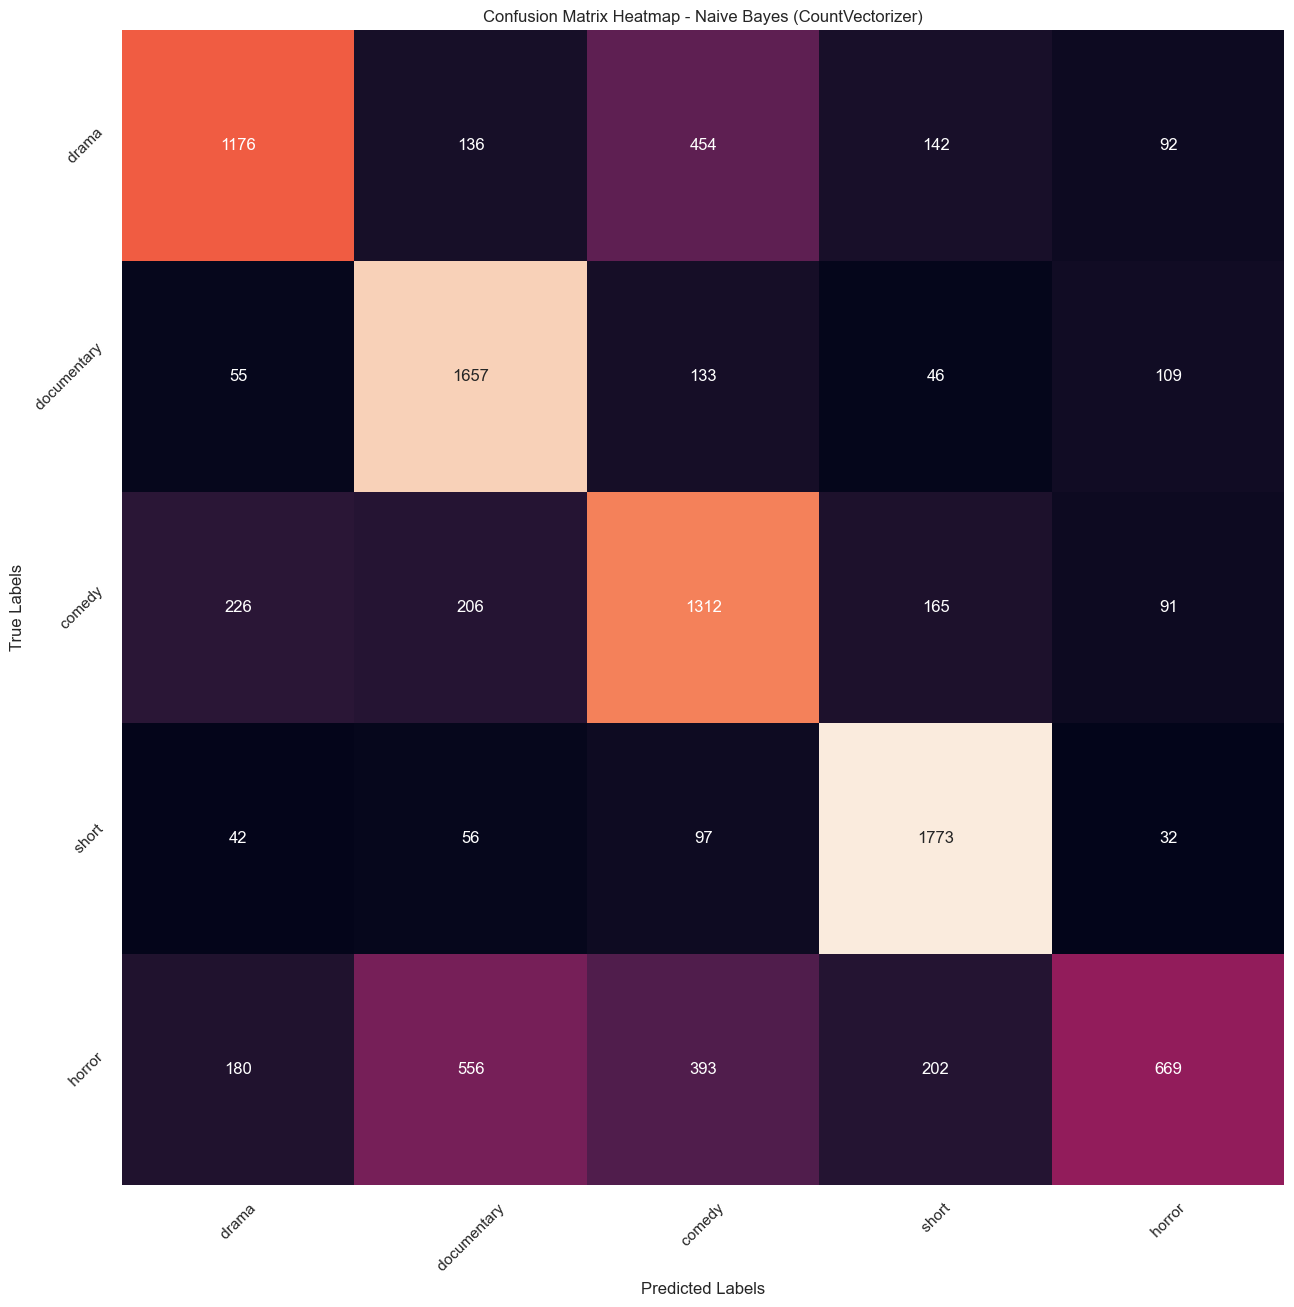

In [22]:
print('Naive Bayes using CountVectorizer')
# Initialize the Naive Bayes classifier
nb_classifier_count = MultinomialNB()

# Train the classifier
nb_classifier_count.fit(count_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_nb_count = nb_classifier_count.predict(count_vectors_test)

# Evaluate the model
accuracy_count = accuracy_score(sampled_test_data['Genre'], predictions_nb_count)
print("Accuracy with CountVectorizer:", accuracy_count)

# Get classification report
print("\nClassification Report with CountVectorizer:")
print(classification_report(sampled_test_data['Genre'], predictions_nb_count))



# Confusion matrix for Naive Bayes with CountVectorizer
cm_nb_count = confusion_matrix(sampled_test_data['Genre'], predictions_nb_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_nb_count, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Naive Bayes (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Logistic Regression

Logistic Regression using Tf-Idf
Accuracy: 0.6749

Classification Report:
               precision    recall  f1-score   support

      comedy        0.66      0.67      0.67      2000
 documentary        0.70      0.79      0.74      2000
       drama        0.57      0.60      0.59      2000
      horror        0.84      0.82      0.83      2000
       short        0.60      0.49      0.54      2000

     accuracy                           0.67     10000
    macro avg       0.67      0.67      0.67     10000
 weighted avg       0.67      0.67      0.67     10000



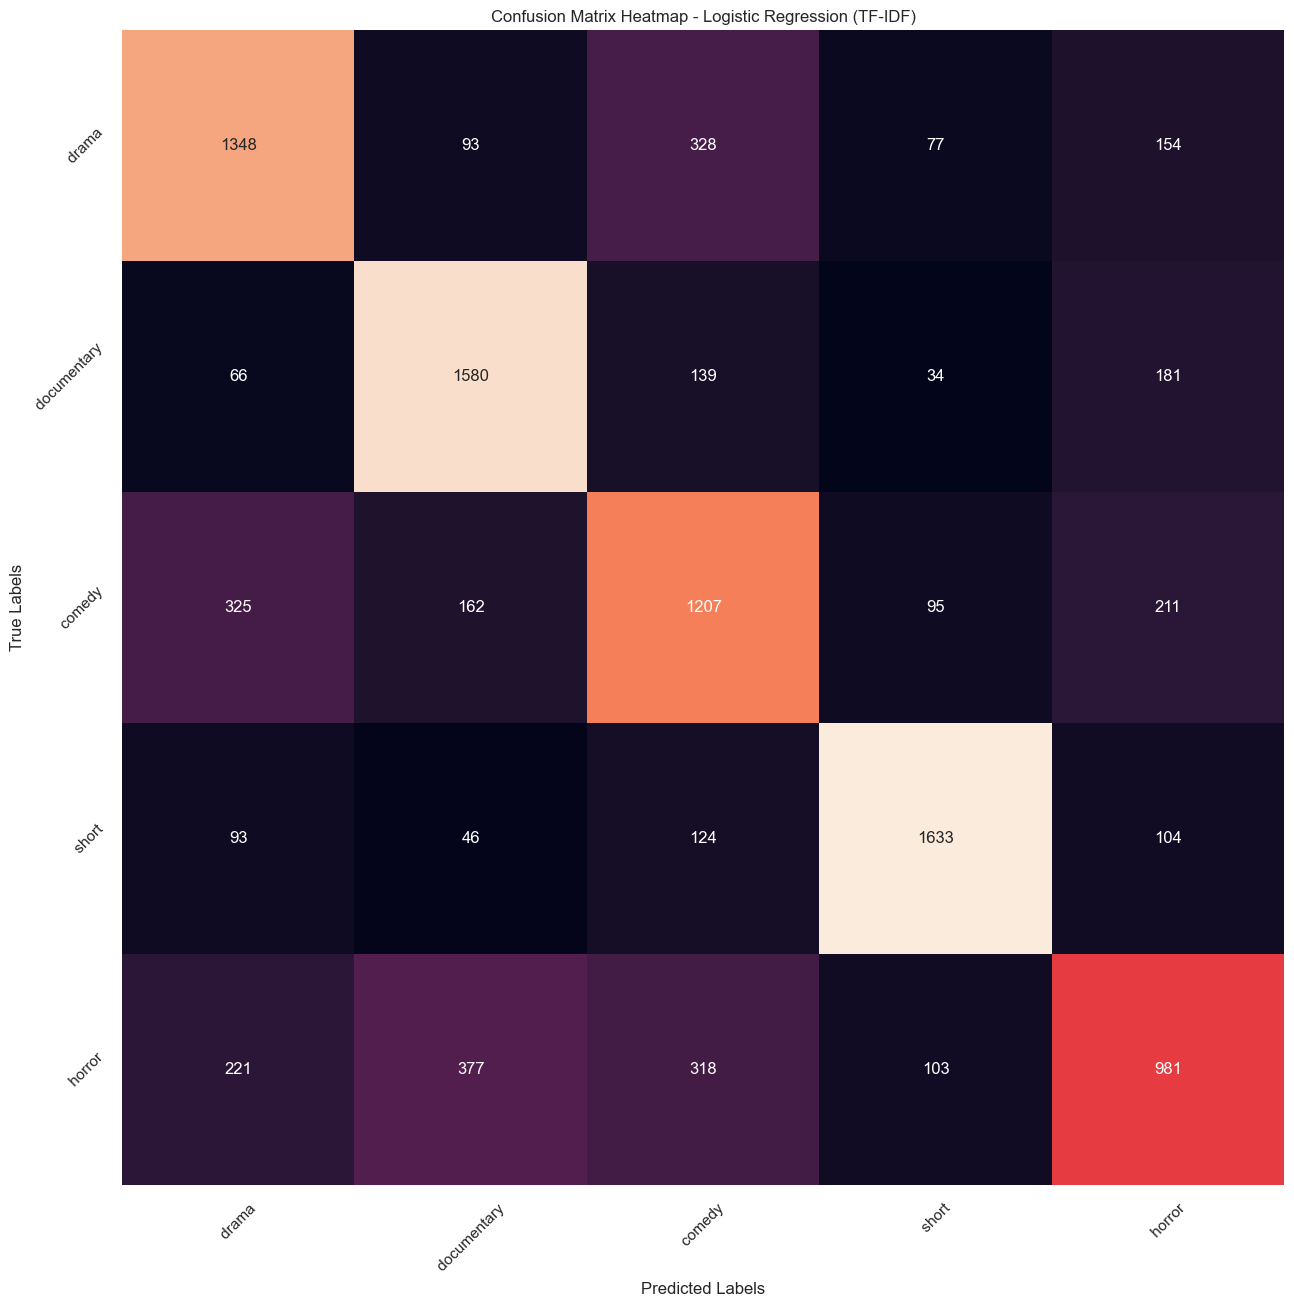

In [25]:
# Logistic Regression
print('Logistic Regression using Tf-Idf')

# Initialize the Logistic Regression classifier
lr_tfidf_classifier = LogisticRegression()

# Train the classifier
lr_tfidf_classifier.fit(tfidf_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_lr_tfidf = lr_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_lr_tfidf = accuracy_score(sampled_test_data['Genre'], predictions_lr_tfidf)
print("Accuracy:", accuracy_lr_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_lr_tfidf))

# Confusion matrix for Logistic Regression with TF-IDF
cm_lr_tfidf = confusion_matrix(sampled_test_data['Genre'], predictions_lr_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_lr_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Logistic Regression (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


Logistic Regression using CountVectorizer
Accuracy: 0.6356

Classification Report:
               precision    recall  f1-score   support

      comedy        0.64      0.63      0.63      2000
 documentary        0.70      0.71      0.71      2000
       drama        0.53      0.54      0.53      2000
      horror        0.82      0.78      0.80      2000
       short        0.51      0.52      0.51      2000

     accuracy                           0.64     10000
    macro avg       0.64      0.64      0.64     10000
 weighted avg       0.64      0.64      0.64     10000



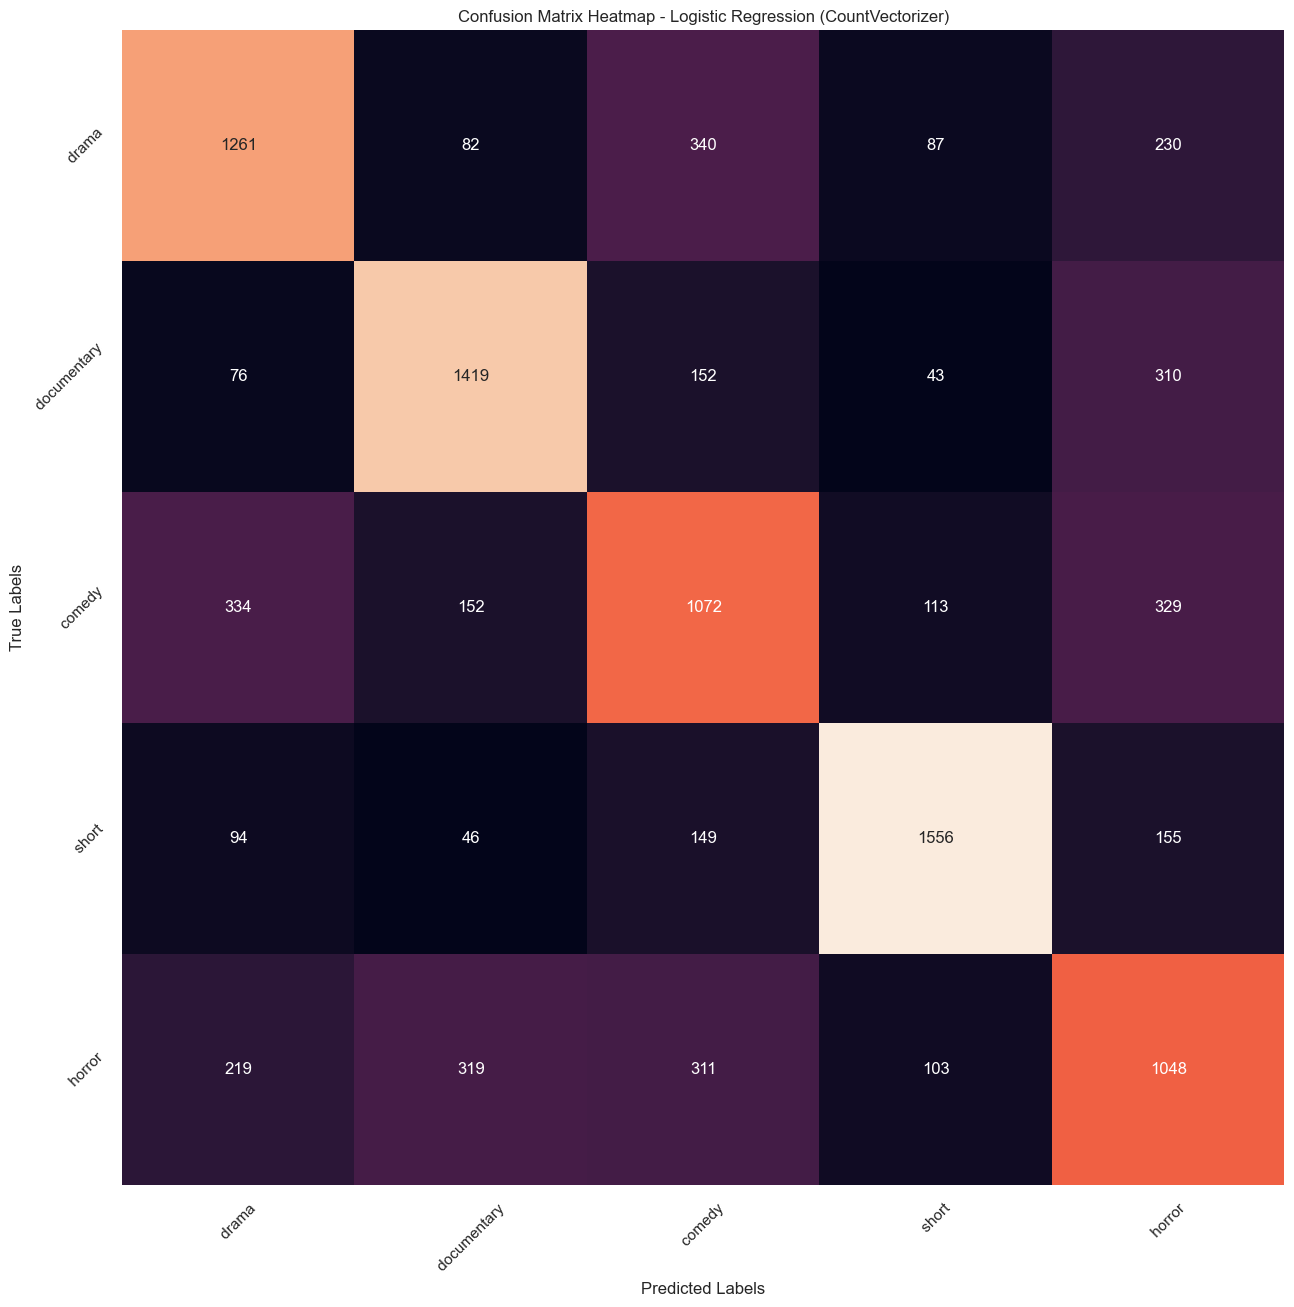

In [26]:
# Logistic Regression using CountVectorizer
print('Logistic Regression using CountVectorizer')

# Initialize the Logistic Regression classifier
lr_count_classifier = LogisticRegression()

# Train the classifier
lr_count_classifier.fit(count_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_lr_count = lr_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_lr_count = accuracy_score(sampled_test_data['Genre'], predictions_lr_count)
print("Accuracy:", accuracy_lr_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_lr_count))

# Confusion matrix for Logistic Regression with CountVectorizer
cm_lr_count = confusion_matrix(sampled_test_data['Genre'], predictions_lr_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_lr_count, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Logistic Regression (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()




### KNN

KNN using tfidf

Accuracy (KNN): 0.4459

Classification Report (KNN):
               precision    recall  f1-score   support

      comedy        0.39      0.48      0.43      2000
 documentary        0.49      0.55      0.52      2000
       drama        0.36      0.31      0.34      2000
      horror        0.56      0.61      0.59      2000
       short        0.40      0.27      0.32      2000

     accuracy                           0.45     10000
    macro avg       0.44      0.45      0.44     10000
 weighted avg       0.44      0.45      0.44     10000



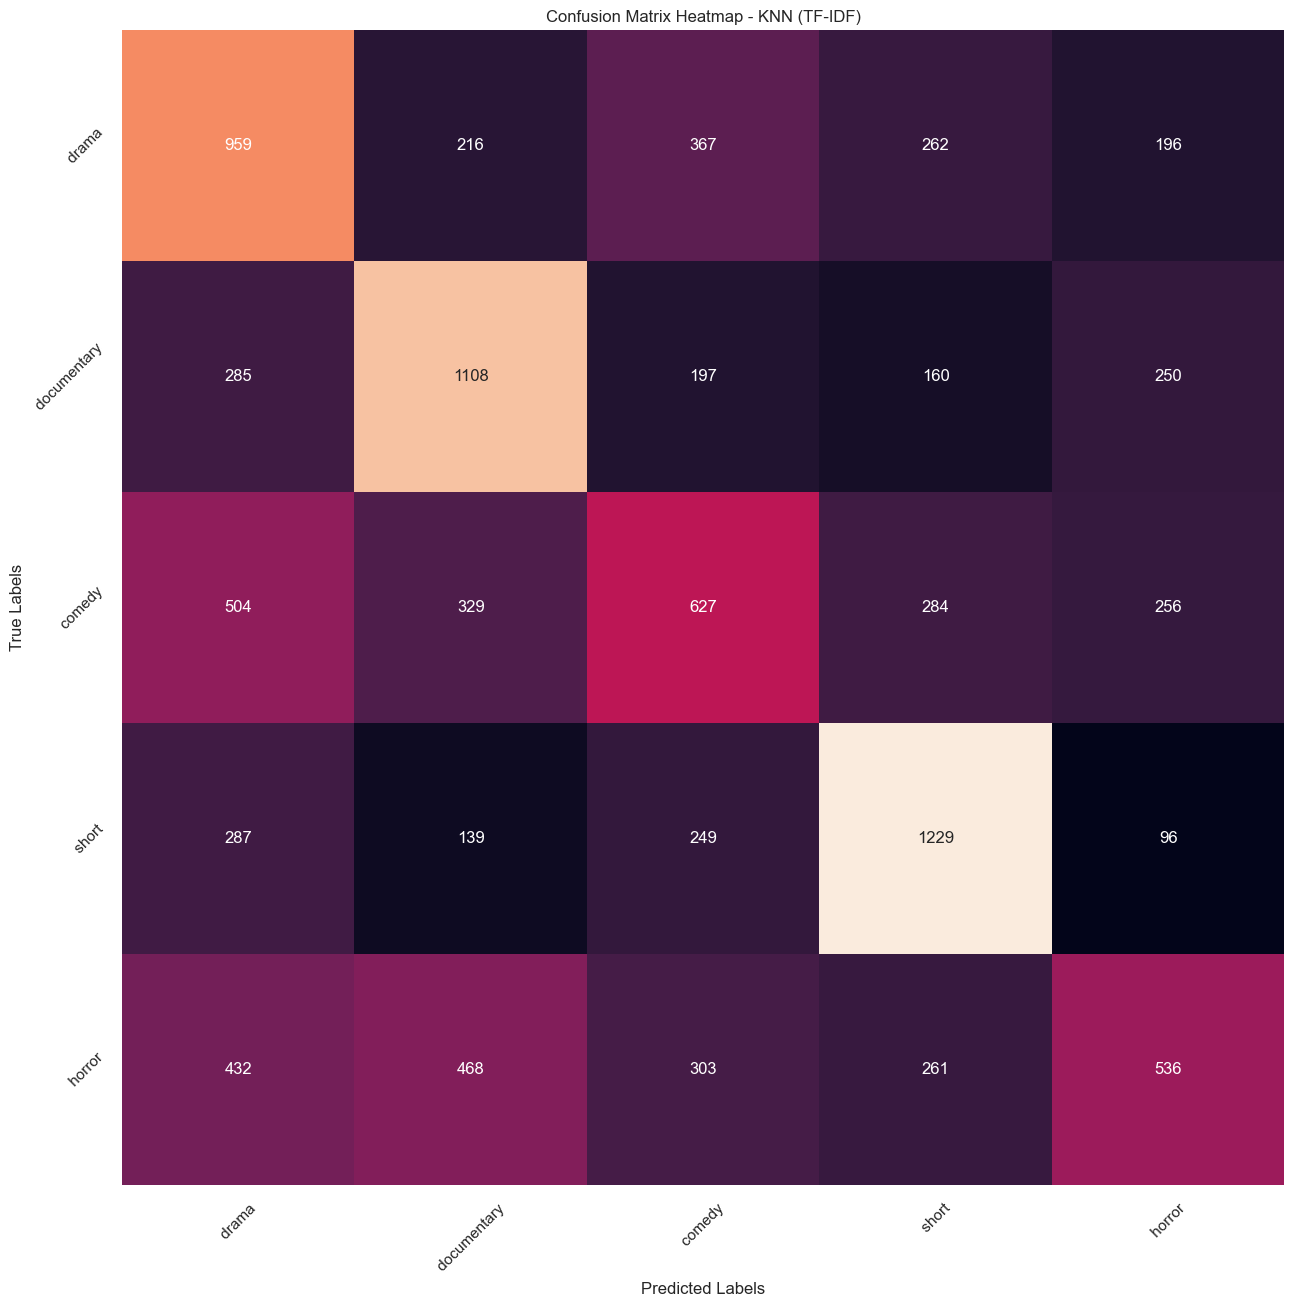

In [29]:
print("KNN using tfidf")

knn_classifier_tfidf = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier_tfidf.fit(tfidf_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data using KNN
predictions_knn_tfidf = knn_classifier_tfidf.predict(tfidf_vectors_test)

# Evaluate the KNN model
accuracy_knn_tfidf  = accuracy_score(sampled_test_data['Genre'], predictions_knn_tfidf)
print("\nAccuracy (KNN):", accuracy_knn_tfidf)

# Get classification report for KNN
print("\nClassification Report (KNN):")
print(classification_report(sampled_test_data['Genre'], predictions_knn_tfidf))

# Confusion matrix for KNN with TF-IDF
cm_knn_tfidf = confusion_matrix(sampled_test_data['Genre'], predictions_knn_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_knn_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - KNN (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


KNN using CountVectorizer

Accuracy (KNN): 0.2314

Classification Report (KNN):
               precision    recall  f1-score   support

      comedy        0.18      0.16      0.17      2000
 documentary        0.64      0.03      0.05      2000
       drama        0.33      0.11      0.17      2000
      horror        0.52      0.08      0.13      2000
       short        0.22      0.79      0.34      2000

     accuracy                           0.23     10000
    macro avg       0.38      0.23      0.17     10000
 weighted avg       0.38      0.23      0.17     10000



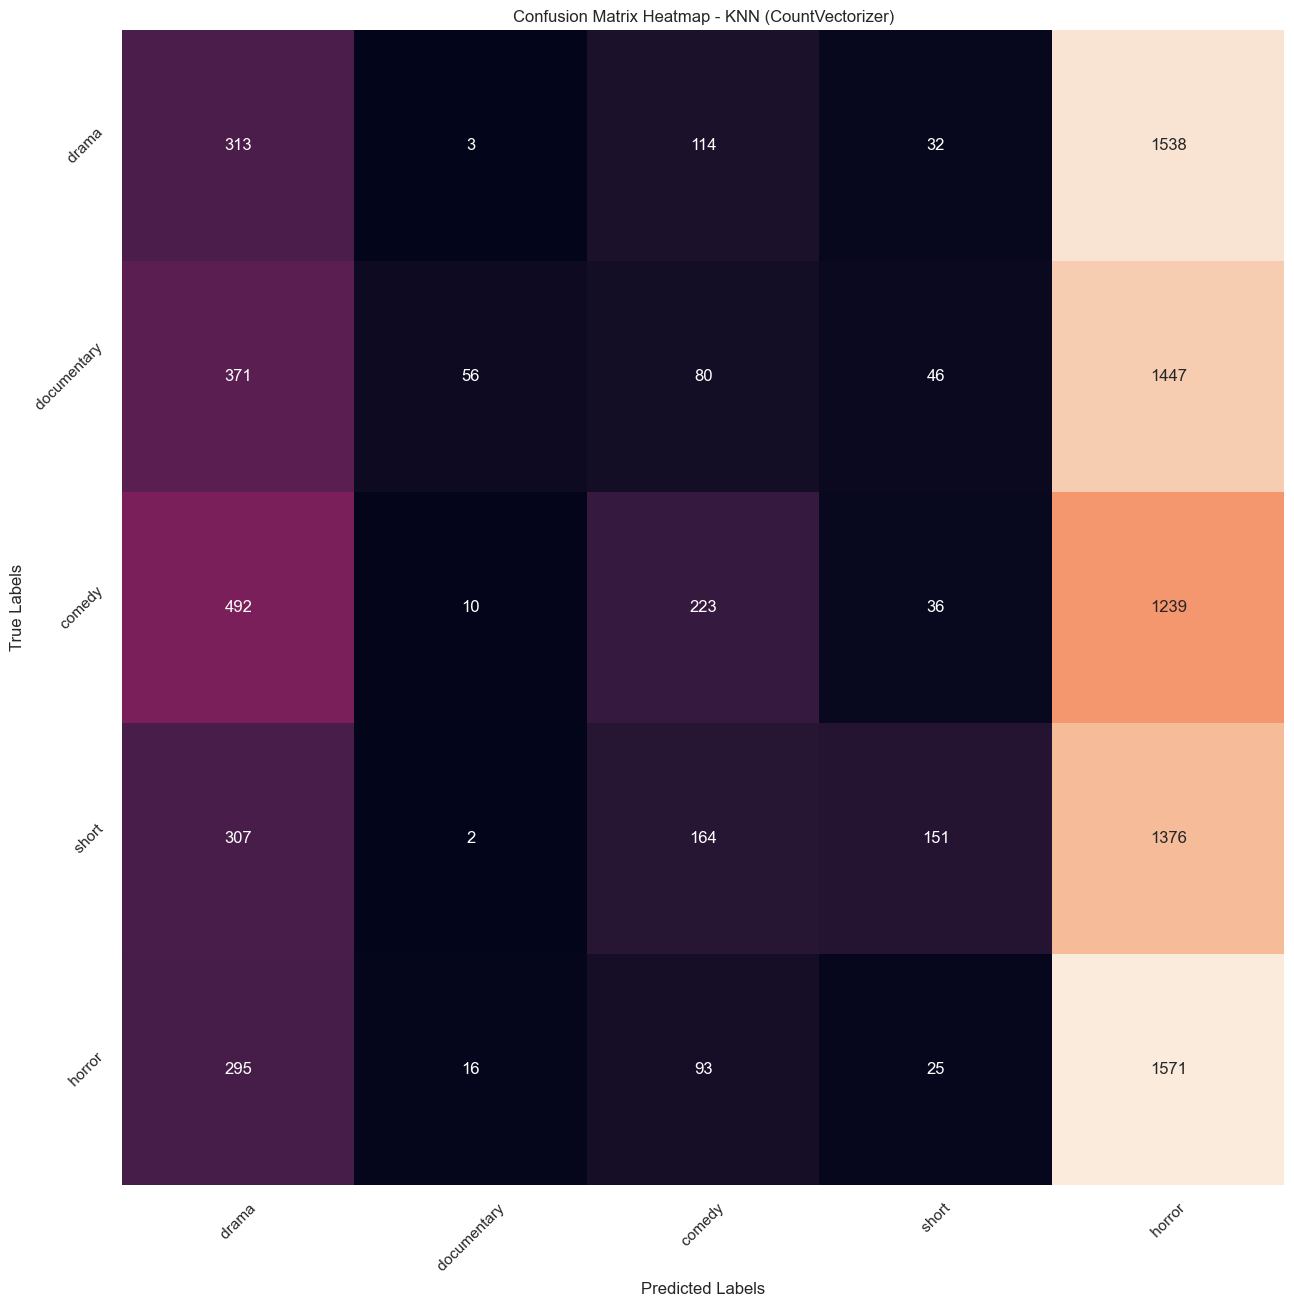

In [30]:
print("KNN using CountVectorizer")
# Initialize the KNN classifier
knn_classifier_count = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier_count.fit(count_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data using KNN
predictions_knn_count = knn_classifier_count.predict(count_vectors_test)

# Evaluate the KNN model
accuracy_knn_count = accuracy_score(sampled_test_data['Genre'], predictions_knn_count)
print("\nAccuracy (KNN):", accuracy_knn_count)

# Get classification report for KNN
print("\nClassification Report (KNN):")
print(classification_report(sampled_test_data['Genre'], predictions_knn_count))


# Confusion matrix for KNN with CountVectorizer
cm_knn_count = confusion_matrix(sampled_test_data['Genre'], predictions_knn_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_knn_count, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - KNN (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Decision Tree Classifier

Decision Tree Classifier using Tf-Idf
Accuracy: 0.4333

Classification Report:
               precision    recall  f1-score   support

      comedy        0.40      0.40      0.40      2000
 documentary        0.53      0.51      0.52      2000
       drama        0.34      0.36      0.35      2000
      horror        0.58      0.55      0.56      2000
       short        0.34      0.35      0.35      2000

     accuracy                           0.43     10000
    macro avg       0.44      0.43      0.44     10000
 weighted avg       0.44      0.43      0.44     10000



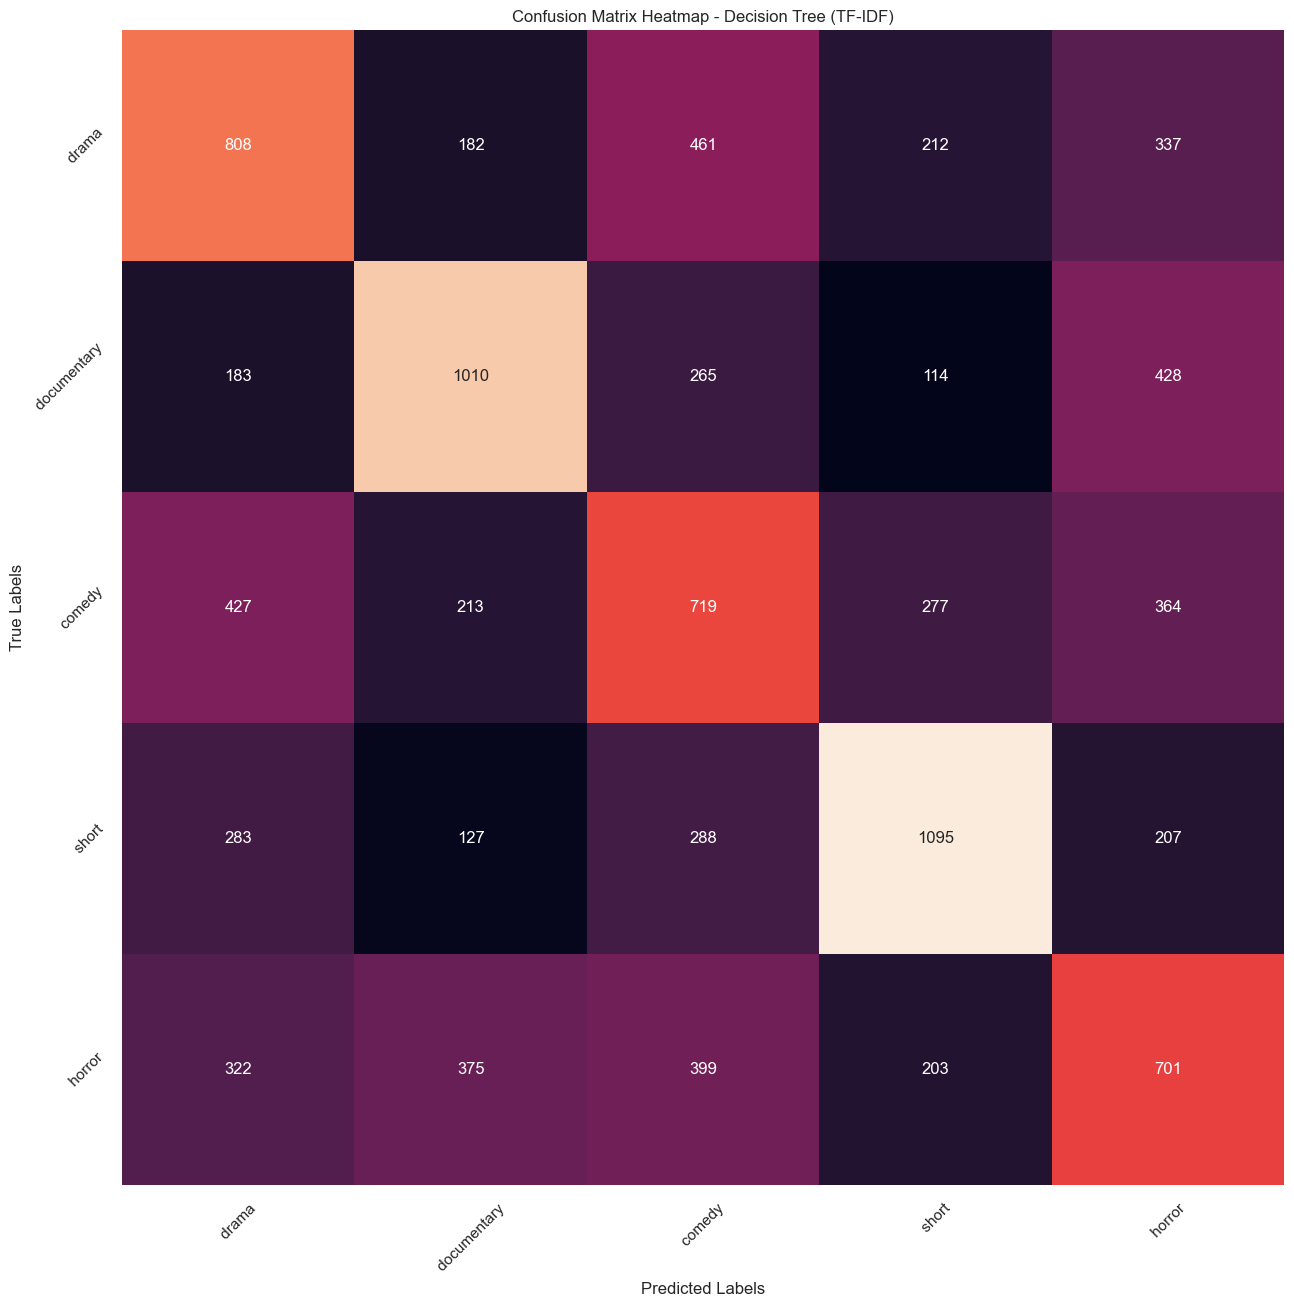

In [31]:
# Decision Tree Classifier
print('Decision Tree Classifier using Tf-Idf')

# Initialize the Decision Tree classifier
dt_tfidf_classifier = DecisionTreeClassifier()

# Train the classifier
dt_tfidf_classifier.fit(tfidf_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_dt_tfidf = dt_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_dt_tfidf = accuracy_score(sampled_test_data['Genre'], predictions_dt_tfidf)
print("Accuracy:", accuracy_dt_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_dt_tfidf))

# Confusion matrix for Decision Tree with TF-IDF
cm_dt_tfidf = confusion_matrix(sampled_test_data['Genre'], predictions_dt_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_dt_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Decision Tree (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Decision Tree Classifier using CountVectorizer
Accuracy: 0.4546

Classification Report:
               precision    recall  f1-score   support

      comedy        0.41      0.43      0.42      2000
 documentary        0.53      0.54      0.54      2000
       drama        0.36      0.36      0.36      2000
      horror        0.60      0.56      0.58      2000
       short        0.37      0.37      0.37      2000

     accuracy                           0.45     10000
    macro avg       0.46      0.45      0.46     10000
 weighted avg       0.46      0.45      0.46     10000



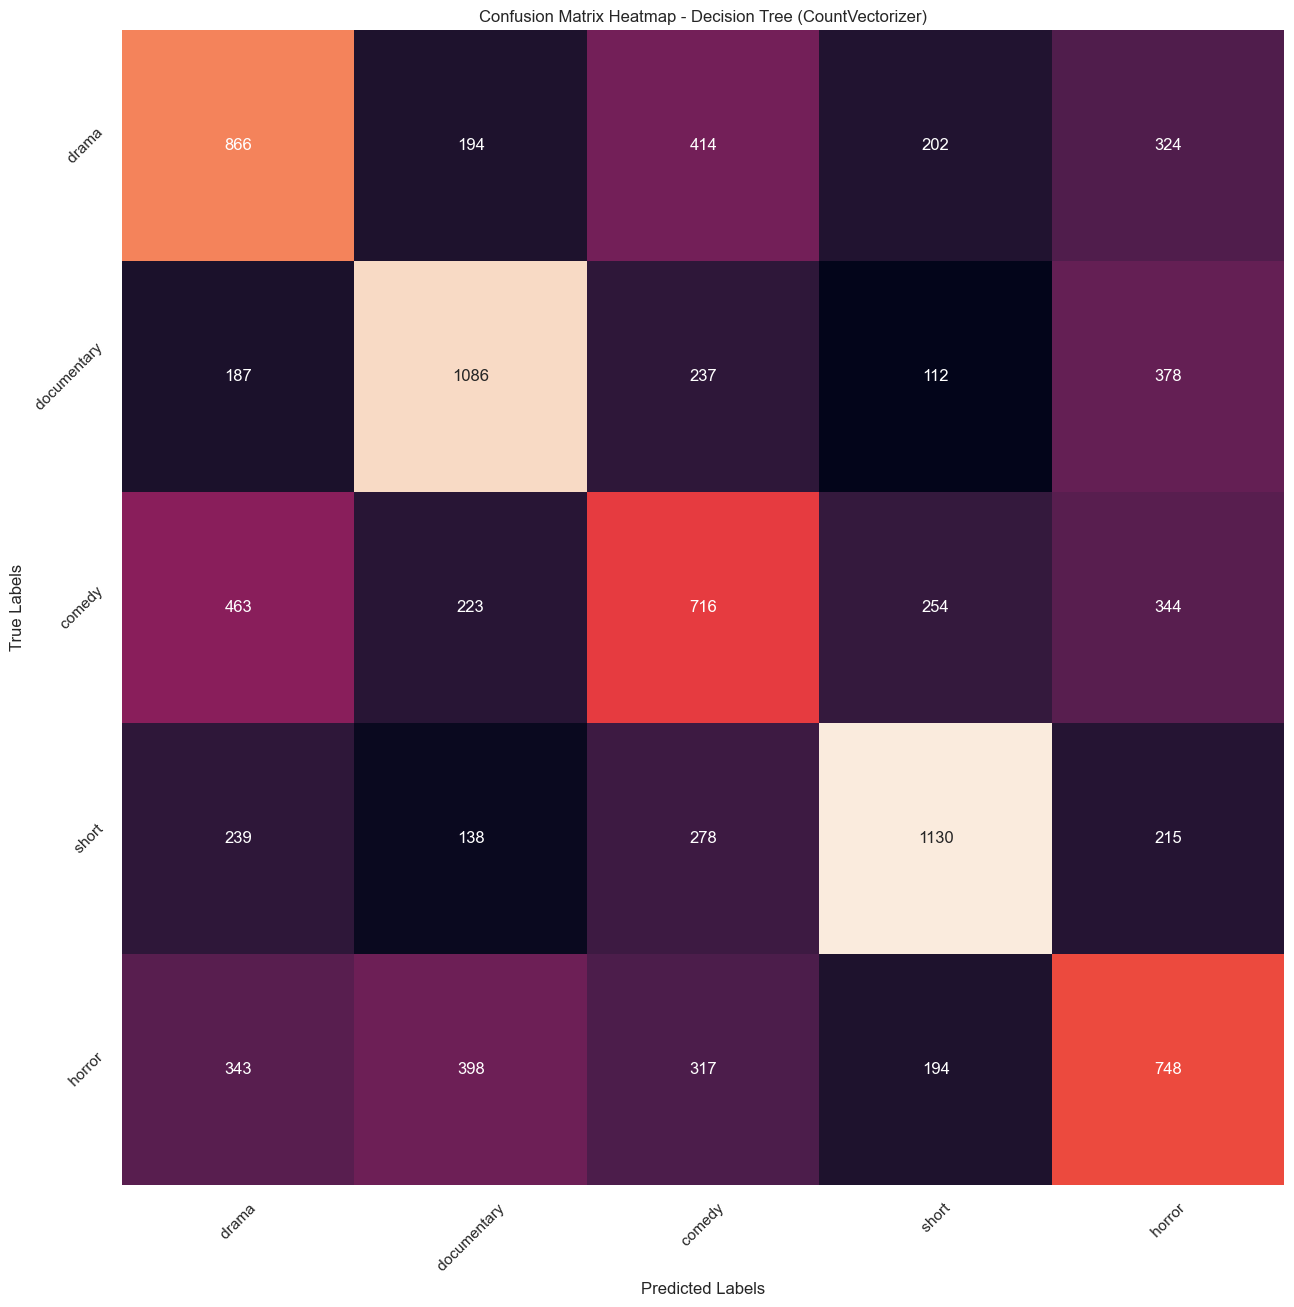

In [32]:
# Decision Tree Classifier using CountVectorizer
print('Decision Tree Classifier using CountVectorizer')

# Initialize the Decision Tree classifier
dt_count_classifier = DecisionTreeClassifier()

# Train the classifier
dt_count_classifier.fit(count_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_dt_count = dt_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_dt_count = accuracy_score(sampled_test_data['Genre'], predictions_dt_count)
print("Accuracy:", accuracy_dt_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_dt_count))

# Confusion matrix for Decision Tree with CountVectorizer
cm_dt_count = confusion_matrix(sampled_test_data['Genre'], predictions_dt_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_dt_count, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Decision Tree (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Random Forest

Random Forest Classifier using Tf-Idf
Accuracy: 0.6214

Classification Report:
               precision    recall  f1-score   support

      comedy        0.60      0.53      0.57      2000
 documentary        0.66      0.76      0.70      2000
       drama        0.53      0.55      0.54      2000
      horror        0.75      0.83      0.79      2000
       short        0.54      0.44      0.48      2000

     accuracy                           0.62     10000
    macro avg       0.61      0.62      0.62     10000
 weighted avg       0.61      0.62      0.62     10000



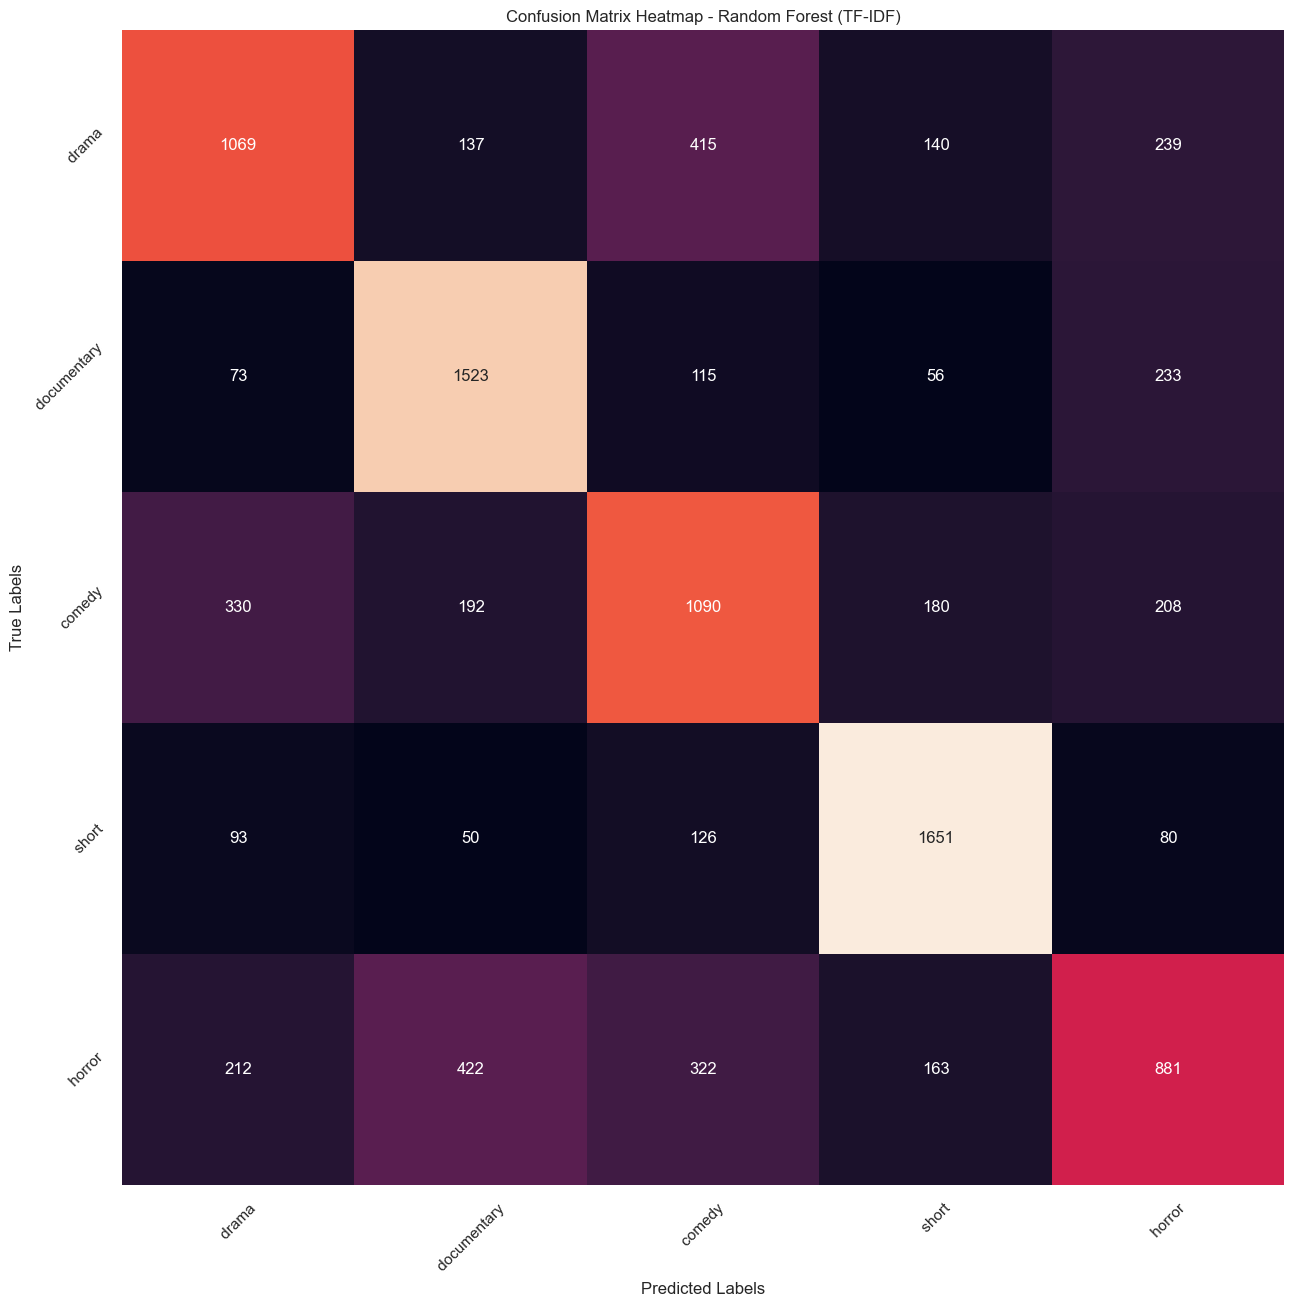

In [33]:
# Random Forest Classifier
print('Random Forest Classifier using Tf-Idf')

# Initialize the Random Forest classifier
rf_tfidf_classifier = RandomForestClassifier()

# Train the classifier
rf_tfidf_classifier.fit(tfidf_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_rf_tfidf = rf_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_rf_tfidf = accuracy_score(sampled_test_data['Genre'], predictions_rf_tfidf)
print("Accuracy:", accuracy_rf_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_rf_tfidf))

# Confusion matrix for Random Forest with TF-IDF
cm_rf_tfidf = confusion_matrix(sampled_test_data['Genre'], predictions_rf_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_rf_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Random Forest Classifier using CountVectorizer
Accuracy: 0.6118

Classification Report:
               precision    recall  f1-score   support

      comedy        0.59      0.54      0.56      2000
 documentary        0.68      0.71      0.70      2000
       drama        0.53      0.52      0.52      2000
      horror        0.72      0.83      0.77      2000
       short        0.50      0.47      0.48      2000

     accuracy                           0.61     10000
    macro avg       0.61      0.61      0.61     10000
 weighted avg       0.61      0.61      0.61     10000



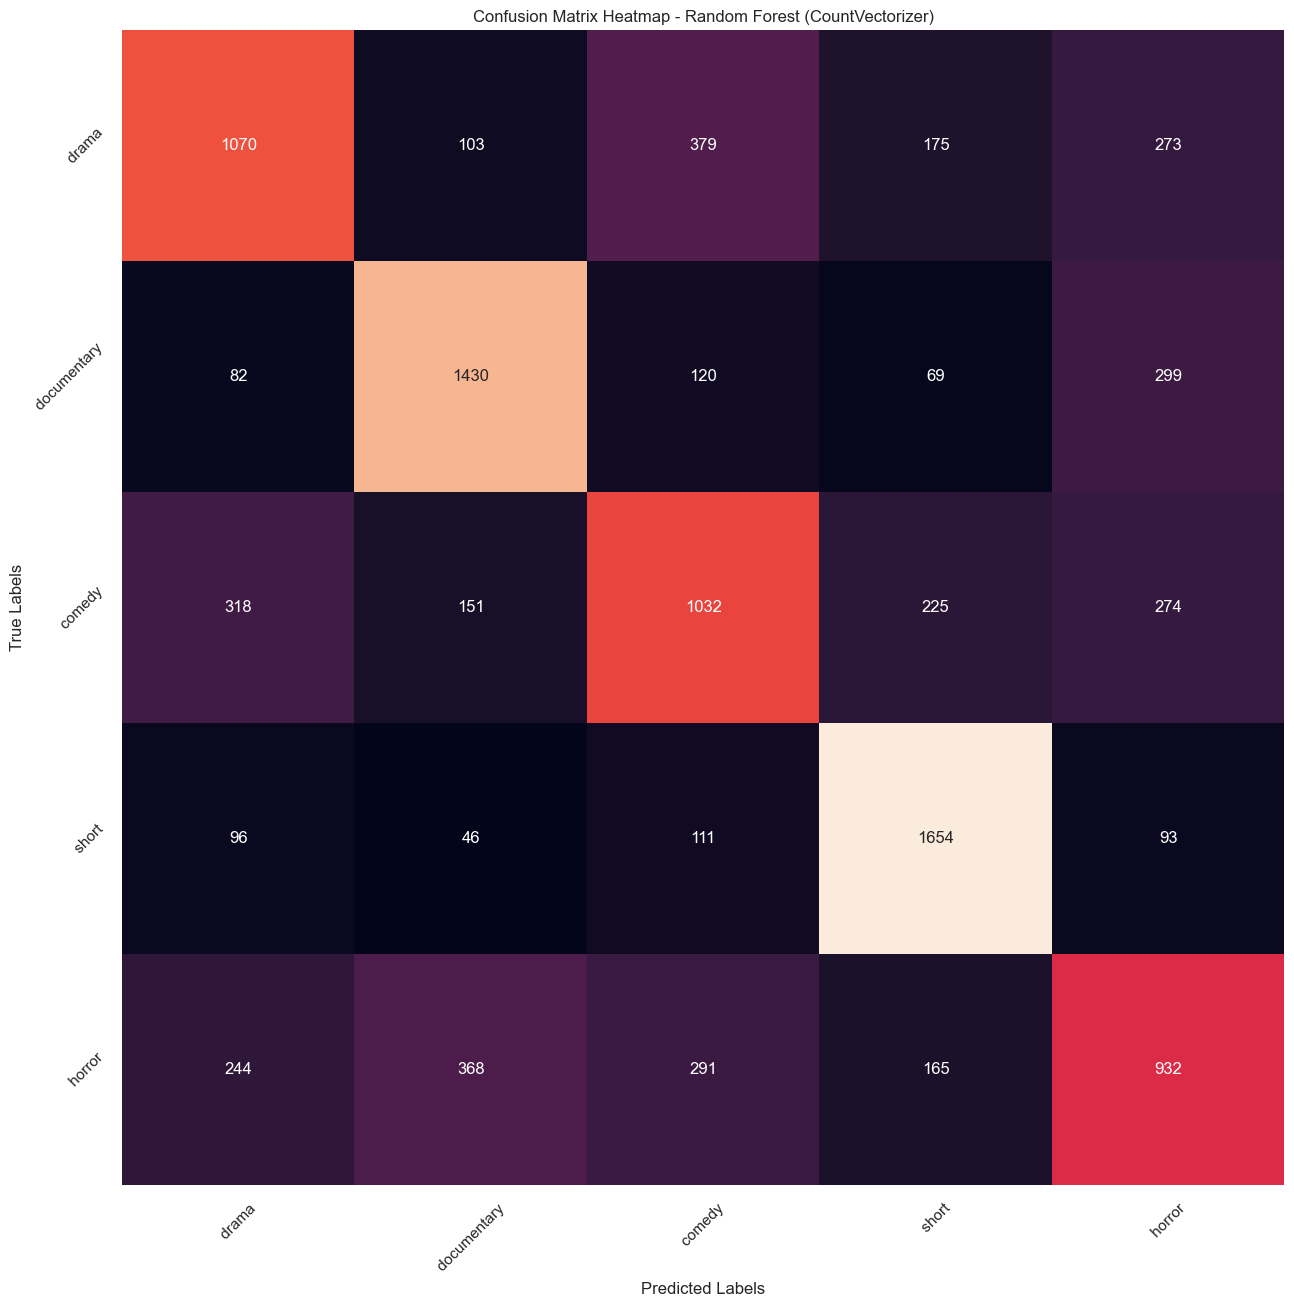

In [34]:
# Random Forest Classifier using CountVectorizer
print('Random Forest Classifier using CountVectorizer')

# Initialize the Random Forest classifier
rf_count_classifier = RandomForestClassifier()

# Train the classifier
rf_count_classifier.fit(count_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_rf_count = rf_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_rf_count = accuracy_score(sampled_test_data['Genre'], predictions_rf_count)
print("Accuracy:", accuracy_rf_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_rf_count))

# Confusion matrix for Random Forest with CountVectorizer
cm_rf_count = confusion_matrix(sampled_test_data['Genre'], predictions_rf_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_rf_count, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Support Vector Machine (SVM)

Support Vector Machine using Tf-Idf
Accuracy: 0.6697

Classification Report:
               precision    recall  f1-score   support

      comedy        0.64      0.67      0.66      2000
 documentary        0.70      0.79      0.74      2000
       drama        0.55      0.62      0.59      2000
      horror        0.87      0.78      0.82      2000
       short        0.59      0.49      0.54      2000

     accuracy                           0.67     10000
    macro avg       0.67      0.67      0.67     10000
 weighted avg       0.67      0.67      0.67     10000



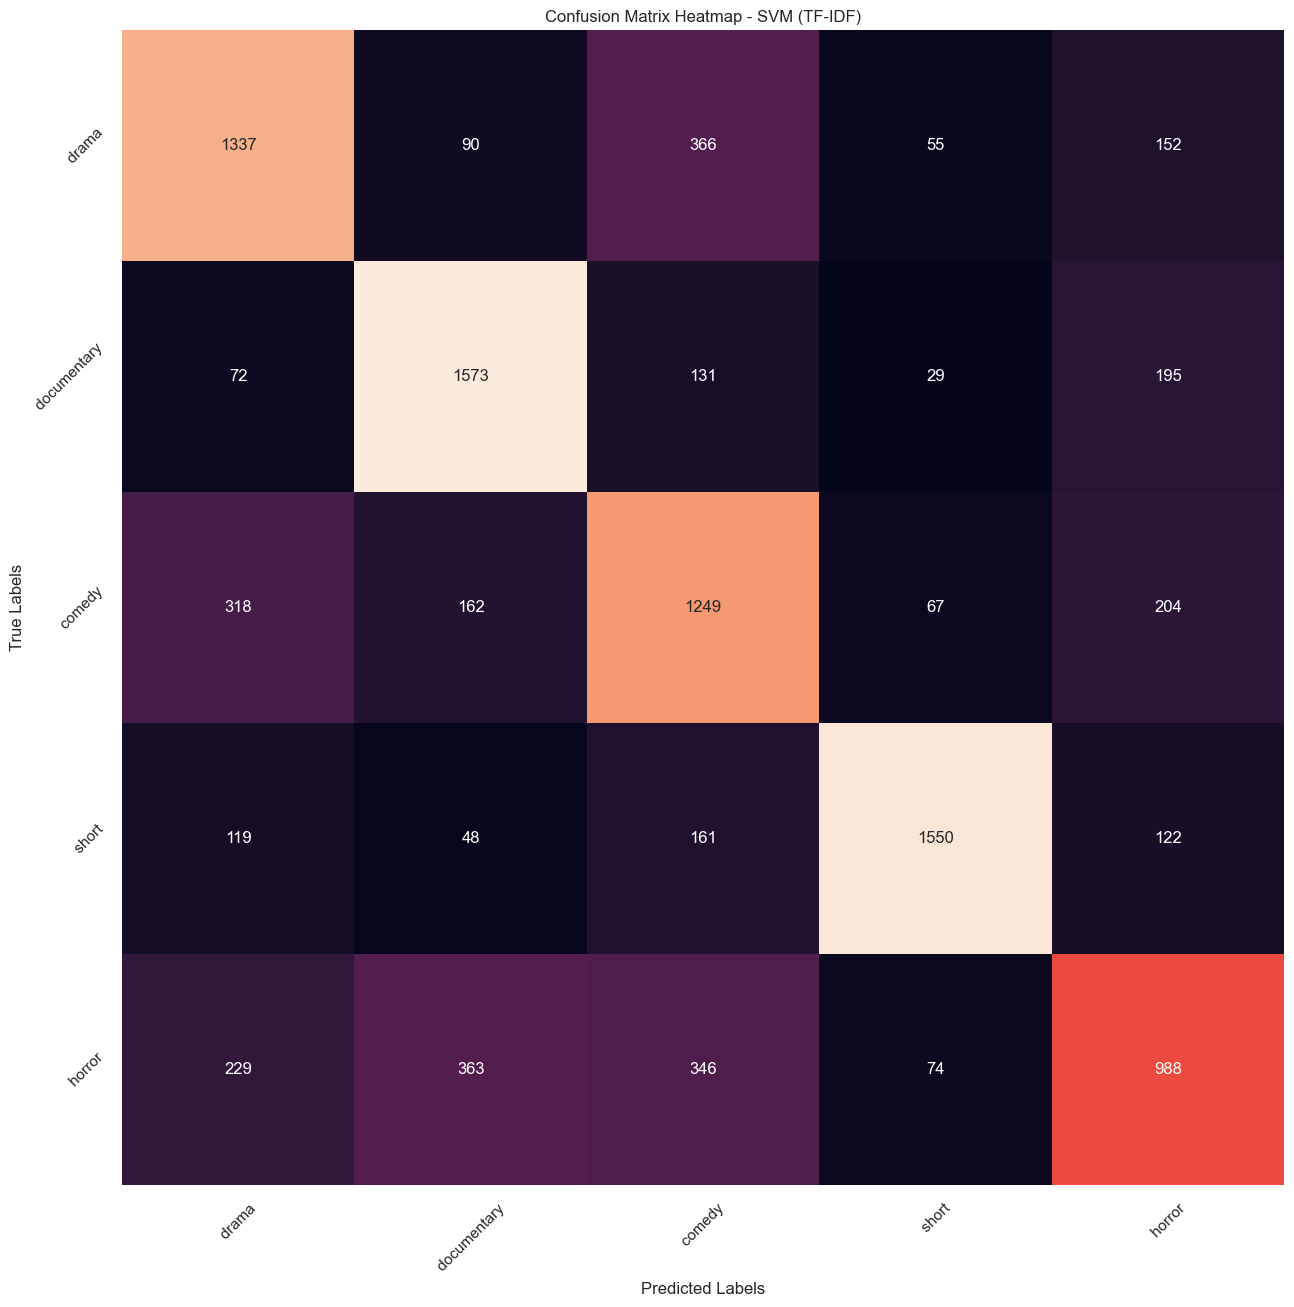

In [35]:
# Support Vector Machine (SVM)
print('Support Vector Machine using Tf-Idf')

# Initialize the SVM classifier
svm_tfidf_classifier = SVC()

# Train the classifier
svm_tfidf_classifier.fit(tfidf_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_svm_tfidf = svm_tfidf_classifier.predict(tfidf_vectors_test)

# Evaluate the model
accuracy_svm_tfidf = accuracy_score(sampled_test_data['Genre'], predictions_svm_tfidf)
print("Accuracy:", accuracy_svm_tfidf)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_svm_tfidf))

# Confusion matrix for SVM with TF-IDF
cm_svm_tfidf = confusion_matrix(sampled_test_data['Genre'], predictions_svm_tfidf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM (TF-IDF)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Support Vector Machine using CountVectorizer
Accuracy: 0.6269

Classification Report:
               precision    recall  f1-score   support

      comedy        0.63      0.60      0.61      2000
 documentary        0.66      0.71      0.69      2000
       drama        0.54      0.56      0.55      2000
      horror        0.85      0.72      0.78      2000
       short        0.50      0.55      0.52      2000

     accuracy                           0.63     10000
    macro avg       0.64      0.63      0.63     10000
 weighted avg       0.64      0.63      0.63     10000



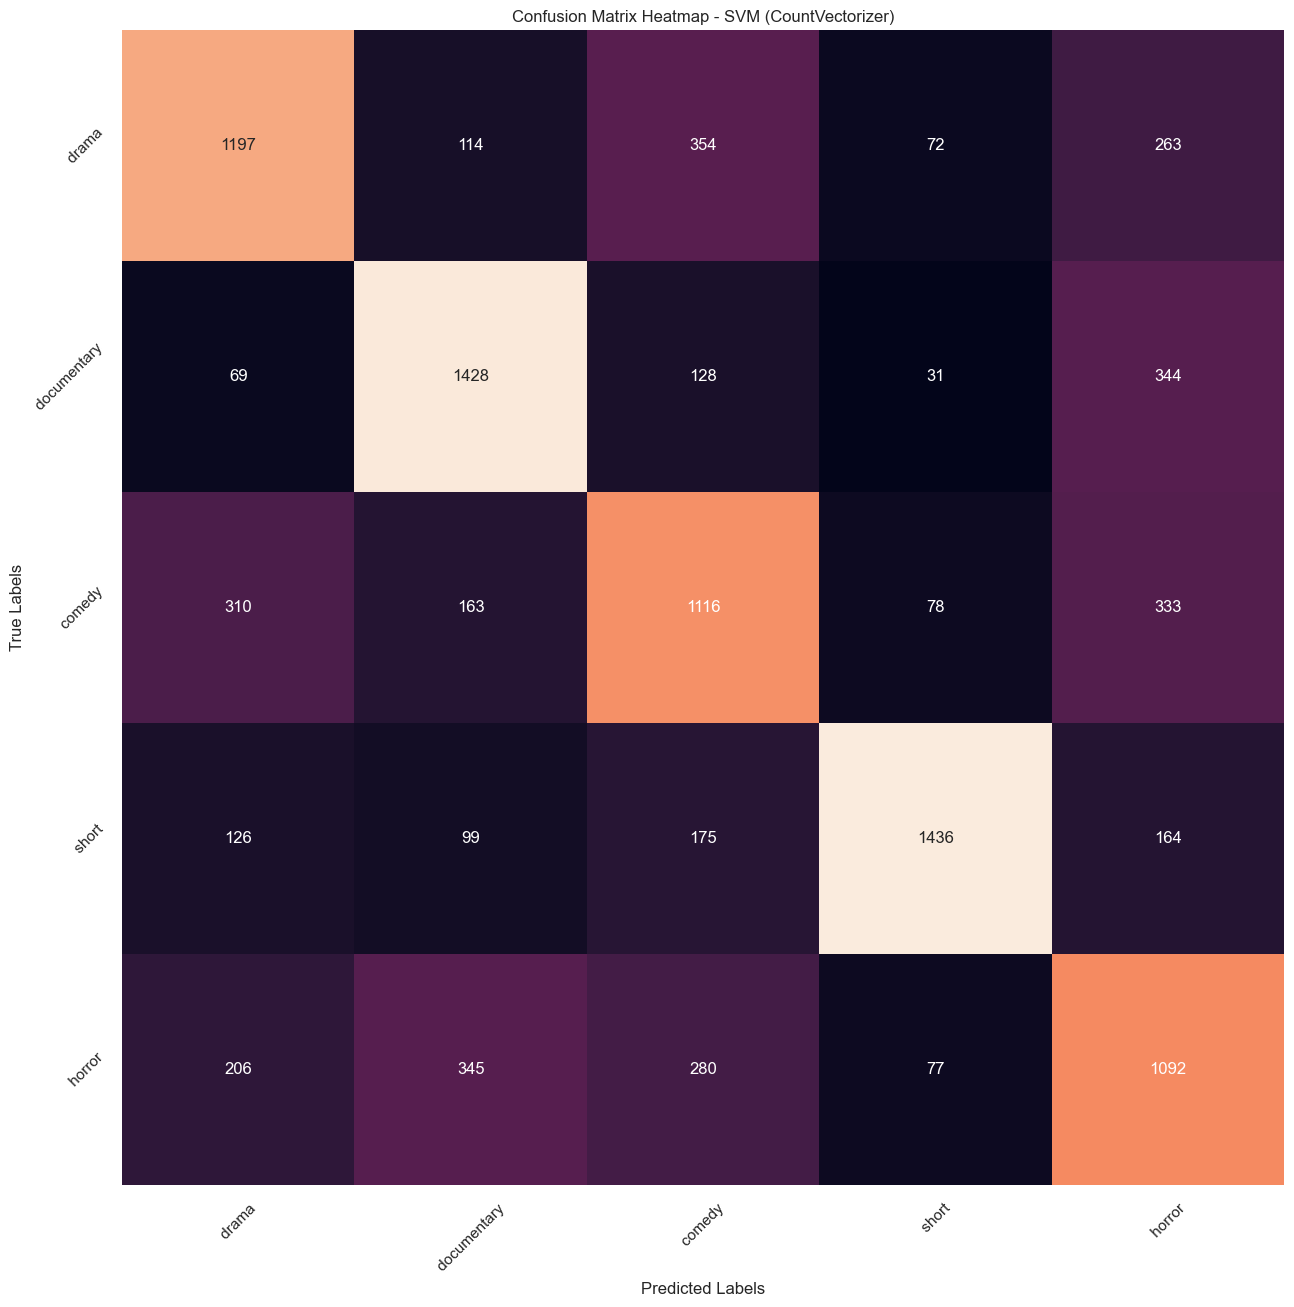

In [36]:
# Support Vector Machine (SVM) using CountVectorizer
print('Support Vector Machine using CountVectorizer')

# Initialize the SVM classifier
svm_count_classifier = SVC(cache_size=500)

# Train the classifier
svm_count_classifier.fit(count_vectors_train, sampled_train_data['Genre'])

# Make predictions on the test data
predictions_svm_count = svm_count_classifier.predict(count_vectors_test)

# Evaluate the model
accuracy_svm_count = accuracy_score(sampled_test_data['Genre'], predictions_svm_count)
print("Accuracy:", accuracy_svm_count)

# Get classification report
print("\nClassification Report:")
print(classification_report(sampled_test_data['Genre'], predictions_svm_count))

# Confusion matrix for SVM with CountVectorizer
cm_svm_count = confusion_matrix(sampled_test_data['Genre'], predictions_svm_count)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_svm_count, annot=True, fmt='d', cbar=False,
            xticklabels=sampled_train_data['Genre'].unique(), yticklabels=sampled_train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM (CountVectorizer)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [40]:
from tabulate import tabulate

# Create a list of lists containing model names and accuracies
accuracy_data = [
    ["Naive Bayes", accuracy_tfidf, accuracy_count],
    ["Logistic Regression", accuracy_lr_tfidf, accuracy_lr_count],
    ["KNN", accuracy_knn_tfidf, accuracy_knn_count],
    ["Decision Tree", accuracy_dt_tfidf, accuracy_dt_count],
    ["Random Forest", accuracy_rf_tfidf, accuracy_rf_count],
    ["SVM", accuracy_svm_tfidf, accuracy_svm_count]
]

# Print the accuracy summary table
print(tabulate(accuracy_data, headers=["Model", "TF-IDF Accuracy", "CountVectorizer Accuracy"], tablefmt="pretty"))

+---------------------+-----------------+--------------------------+
|        Model        | TF-IDF Accuracy | CountVectorizer Accuracy |
+---------------------+-----------------+--------------------------+
|     Naive Bayes     |      0.656      |          0.6587          |
| Logistic Regression |     0.6749      |          0.6356          |
|         KNN         |     0.4459      |          0.2314          |
|    Decision Tree    |     0.4333      |          0.4546          |
|    Random Forest    |     0.6214      |          0.6118          |
|         SVM         |     0.6697      |          0.6269          |
+---------------------+-----------------+--------------------------+



# Word2vec

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
train_path = 'Genre Classification Dataset/train_data.txt'
test_path = 'Genre Classification Dataset/test_data_solution.txt'

train_data = pd.read_csv(train_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])
test_data = pd.read_csv(test_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

# Train or load a Word2Vec model
word2vec_model = Word2Vec(sentences=train_data['Description'], vector_size=100, window=5, min_count=1, workers=4)

# Function to convert a document into a fixed-length vector
def document_to_vector(document, model):
    words = document.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no words in the model

# Convert train and test data to word embeddings
train_word_embeddings = np.array([document_to_vector(doc, word2vec_model) for doc in train_data['Description']])
test_word_embeddings = np.array([document_to_vector(doc, word2vec_model) for doc in test_data['Description']])

# Initialize SVM classifier
svm_classifier_word2vec = SVC()

# Train the classifier
svm_classifier_word2vec.fit(train_word_embeddings, train_data['Genre'])

# Make predictions on the test data
predictions_svm_word2vec = svm_classifier_word2vec.predict(test_word_embeddings)

# Evaluate the model
accuracy_svm_word2vec = accuracy_score(test_data['Genre'], predictions_svm_word2vec)
print("Accuracy:", accuracy_svm_word2vec)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_data['Genre'], predictions_svm_word2vec))

# Confusion matrix for SVM with Word2Vec
cm_svm_word2vec = confusion_matrix(test_data['Genre'], predictions_svm_word2vec)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_svm_word2vec, annot=True, fmt='d', cbar=False,
            xticklabels=train_data['Genre'].unique(), yticklabels=train_data['Genre'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM (Word2Vec)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()






